In [140]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt
import yfinance as yf
import datetime

import warnings
warnings.filterwarnings("ignore")

import RECH_functions as RECH

import pickle

In [141]:
import pyEX as pyx

In [14]:
tickers = {"SP" : "^GSPC", 
          "BTC" : "BTC-USD"}

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'S&P 500 log returns')

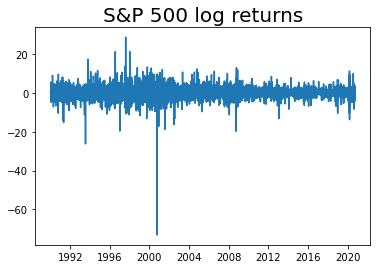

In [135]:
data = yf.download("AAPL", start="1990-01-01", end="2020-10-01")
data['pct_change'] = data["Adj Close"].pct_change()
data['log_ret'] = np.log(data["Adj Close"]) - np.log(data["Adj Close"].shift(1))
data['log_ret * 100'] = data['log_ret'] * 100
returns = data['log_ret * 100'].values[1:]
plt.plot(data['log_ret * 100'])
plt.title("S&P 500 log returns", size = 20)

In [136]:
x = [data.index[i+1] - data.index[i] for i in range(len(data)-1)]

In [142]:
import pyEX as pyx
c = pyx.Client(api_token='sk_57ef4ce7471541fe8187862d486a8c4c', version='stable')

In [143]:
sym='AAPL'
timeframe='max'
df = c.chartDF(symbol=sym, timeframe=timeframe, sort = "asc")

In [144]:
df

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
date,,,,,,,,,,,,,,,,,,,,,
2006-12-29,3.0300,3.0500,2.9771,2.9984,2006-12-29,AAPL,1.077285e+09,HISTORICAL_PRICES,AAPL,,...,83.3600,38474449,2.5559,2.5828,2.5999,2.5378,1.077285e+09,"Dec 29, 06",0.0000,0.0000
2007-01-03,2.9929,3.0921,2.9250,3.0300,2007-01-03,AAPL,1.245733e+09,HISTORICAL_PRICES,AAPL,,...,81.9000,44490464,2.5828,2.5512,2.6358,2.4933,1.245733e+09,"Jan 3, 07",-0.0371,-0.0122
2007-01-04,3.0593,3.0696,2.9936,2.9914,2007-01-04,AAPL,8.561265e+08,HISTORICAL_PRICES,AAPL,,...,83.8200,30575948,2.5500,2.6078,2.6166,2.5518,8.561265e+08,"Jan 4, 07",0.0664,0.0222
2007-01-05,3.0375,3.0786,3.0143,3.0632,2007-01-05,AAPL,8.354034e+08,HISTORICAL_PRICES,AAPL,,...,84.4000,29835835,2.6111,2.5892,2.6242,2.5694,8.354034e+08,"Jan 5, 07",-0.0218,-0.0071
2007-01-08,3.0525,3.0904,3.0457,3.0700,2007-01-08,AAPL,7.977253e+08,HISTORICAL_PRICES,AAPL,,...,85.2800,28490191,2.6169,2.6020,2.6343,2.5962,7.977253e+08,"Jan 8, 07",0.0150,0.0049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-04,138.3800,142.6700,134.3800,142.0900,2022-11-04,AAPL,1.408148e+08,HISTORICAL_PRICES,AAPL,,...,134.3800,140814796,142.0900,138.3800,142.6700,134.3800,1.408148e+08,"Nov 4, 22",-0.5000,-0.0036
2022-11-07,138.9200,139.1450,135.6710,137.1100,2022-11-07,AAPL,8.337463e+07,HISTORICAL_PRICES,AAPL,,...,135.6710,83374628,137.1100,138.9200,139.1450,135.6710,8.337463e+07,"Nov 7, 22",0.5400,0.0039
2022-11-08,139.5000,141.4300,137.4900,140.4100,2022-11-08,AAPL,8.990848e+07,HISTORICAL_PRICES,AAPL,,...,137.4900,89908477,140.4100,139.5000,141.4300,137.4900,8.990848e+07,"Nov 8, 22",0.5800,0.0042


In [138]:
#df

In [139]:
data

,Open,High,Low,Close,Adj Close,Volume,pct_change,log_ret,log_ret * 100
Date,,,,,,,,,
1990-01-02 00:00:00-05:00,0.314732,0.334821,0.312500,0.332589,0.264886,183198400,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,0.339286,0.339286,0.334821,0.334821,0.266663,207995200,0.006711,0.006688,0.668836
1990-01-04 00:00:00-05:00,0.341518,0.345982,0.332589,0.335938,0.267553,221513600,0.003337,0.003331,0.333149
1990-01-05 00:00:00-05:00,0.337054,0.341518,0.330357,0.337054,0.268442,123312000,0.003322,0.003316,0.331610
1990-01-08 00:00:00-05:00,0.334821,0.339286,0.330357,0.339286,0.270220,101572800,0.006622,0.006600,0.660027
...,...,...,...,...,...,...,...,...,...
2020-09-24 00:00:00-04:00,105.169998,110.250000,105.000000,108.220001,106.752136,167743300,0.010269,0.010217,1.021659
2020-09-25 00:00:00-04:00,108.430000,112.440002,107.669998,112.279999,110.757065,149981400,0.037516,0.036830,3.682953
2020-09-28 00:00:00-04:00,115.010002,115.320000,112.779999,114.959999,113.400696,137672400,0.023869,0.023588,2.358833
